<a href="https://colab.research.google.com/github/gitHasty-0321/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/STEVEN_HASTINGS_SPRINT_1_MODULE_3__LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-22 02:58:52--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.164.13
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.164.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  95.9MB/s    in 2.0s    

2020-01-22 02:58:54 (95.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd

In [6]:
products = pd.read_csv('products.csv')
products.drop(labels=['department_id','aisle_id'],axis=1,inplace=True)
print(products.shape)
products.head()

(49688, 2)


,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [7]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
#concatenate order_products__prior and order_products__train
order_products = pd.concat([order_products__prior,order_products__train])
order_products.shape

(33819106, 4)

In [10]:
order_products.product_id.value_counts()[:10]

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
47766    184224
47626    160792
16797    149445
26209    146660
27845    142813
Name: product_id, dtype: int64

In [11]:
products = products[products.product_id.isin([24852,13176,21137,21903,47209,47766,47626,16797,26209,27845])]
products.sort_values('product_id')

,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes
27844,27845,Organic Whole Milk
47208,47209,Organic Hass Avocado
47625,47626,Large Lemon
47765,47766,Organic Avocado


In [12]:
# slimming down frame
order_products.drop(['reordered','add_to_cart_order'],axis=1,inplace=True)
print(order_products.shape)

(33819106, 2)


In [13]:
order__products = pd.merge(order_products,products, on='product_id',how='inner')
order__products_counts = order__products.product_name.value_counts()
order__products_counts.head(10)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [0]:
column_names = ['Banana','Bag of Organic Bananas',
                'Organic Strawberries','Organic Baby Spinach',
                'Organic Hass Avocado','Organic Avocado','Large Lemon',
                'Strawberries','Limes','Organic Whole Milk']

In [0]:
top_ten_products = pd.DataFrame(order__products_counts, index=column_names)

In [0]:
top_ten_products.reset_index()

top_ten_products.rename(columns= {'product_name':'Number of Orders'},copy=True,inplace=True)

top_ten_products.rename_axis('Product Names',inplace=True)

In [17]:
top_ten_products

,Number of Orders
Product Names,
Banana,491291
Bag of Organic Bananas,394930
Organic Strawberries,275577
Organic Baby Spinach,251705
Organic Hass Avocado,220877
Organic Avocado,184224
Large Lemon,160792
Strawberries,149445
Limes,146660


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [19]:
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [20]:
table2['index'] = table2['index'].map({'treatmenta':'a','treatmentb':'b'})
table2

,index,John Smith,Jane Doe,Mary Johnson
0,a,NaN,16.0,3.0
1,b,2.0,11.0,1.0


In [21]:
tidy2 = table2.melt(id_vars='index', value_vars=['John Smith','Jane Doe', 'Mary Johnson'])
tidy2

,index,variable,value
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [22]:
wide = tidy2.pivot_table(index='variable',columns='index',values='value')
wide

index,a,b
variable,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


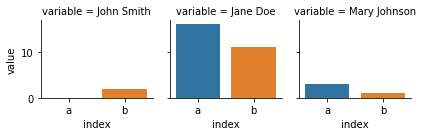

In [23]:
sns.catplot(x='index',y='value',col='variable',
            kind='bar',data=tidy2,height=2)

In [0]:
flights = sns.load_dataset('flights')

In [25]:
flights.pivot_table(index='year',columns='month')

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [26]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url,width=600)

display(example)

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

In [28]:
products = products.drop(['department_id','aisle_id'],axis=1)
products.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [29]:
order_products = order_products.drop(['add_to_cart_order','reordered'],axis=1)
order_products.head()

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [0]:
orders = orders.drop(['days_since_prior_order','order_dow','eval_set','user_id'],axis=1)

In [31]:
orders.head()

,order_id,order_number,order_hour_of_day
0,2539329,1,8
1,2398795,2,7
2,473747,3,12
3,2254736,4,7
4,431534,5,15


In [0]:
a = products[['product_id','product_name']]
b = order_products[['order_id', 'product_id']]
c = orders[['order_id', 'order_hour_of_day']]

merged1 = pd.merge(a,b)
merged2 = pd.merge(merged1, c)

In [33]:
merged1.head()

,product_id,product_name,order_id
0,1,Chocolate Sandwich Cookies,1107
1,1,Chocolate Sandwich Cookies,5319
2,1,Chocolate Sandwich Cookies,7540
3,1,Chocolate Sandwich Cookies,9228
4,1,Chocolate Sandwich Cookies,9273


In [34]:
merged2.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
mm = pd.DataFrame(merged2.groupby(['order_hour_of_day','order_id']).product_name.value_counts())

In [162]:
mm

product_name
order_hour_of_day order_id product_name                                                    
0                 30       Mango Chunks                                                   1
                           Organic Unsweetened Soy Milk Beverage                          1
                           Synergy Organic Kombucha Gingerberry                           1
                  47       Beef Franks                                                    1
                           Golden Pineapple                                               1
...                                                                                     ...
23                3421020  Organic Chili Spicy                                            1
                           Organic Cocoa Crunch Protein Bar                               1
                           Organic Reduced Fat 2% Milk                                    1
                           Organic Salted Individually Wrapped Quarters Bu...             1
                           Pure Coconut Water                                             1

[33819106 rows x 1 columns]

In [0]:
m_m = pd.DataFrame(merged2.groupby(['product_id','order_hour_of_day']).order_id.quantile())

In [164]:
m_m

order_id
product_id order_hour_of_day           
1          0                  1590491.5
           1                   943120.0
           2                  1200270.0
           3                  1956824.0
           4                   848611.5
...                                 ...
49688      19                  976732.0
           20                 1496128.5
           21                 2474179.0
           22                 1067407.0
           23                 1173882.0

[777214 rows x 1 columns]

In [176]:
merged_prep = merged2.product_name.value_counts()[:25]
merged_prep

Banana                        491291
Bag of Organic Bananas        394930
Organic Strawberries          275577
Organic Baby Spinach          251705
Organic Hass Avocado          220877
Organic Avocado               184224
Large Lemon                   160792
Strawberries                  149445
Limes                         146660
Organic Whole Milk            142813
Organic Raspberries           142603
Organic Yellow Onion          117716
Organic Garlic                113936
Organic Zucchini              109412
Organic Blueberries           105026
Cucumber Kirby                 99728
Organic Fuji Apple             92889
Organic Lemon                  91251
Organic Grape Tomatoes         88078
Apple Honeycrisp Organic       87272
Seedless Red Grapes            86748
Organic Cucumber               85005
Honeycrisp Apple               83320
Organic Baby Carrots           80493
Sparkling Water Grapefruit     79245
Name: product_name, dtype: int64

In [0]:
prod_counts = pd.DataFrame(merged_prep)

In [171]:
prod_counts

,product_name
Banana,491291
Bag of Organic Bananas,394930
Organic Strawberries,275577
Organic Baby Spinach,251705
Organic Hass Avocado,220877
Organic Avocado,184224
Large Lemon,160792
Strawberries,149445
Limes,146660
Organic Whole Milk,142813


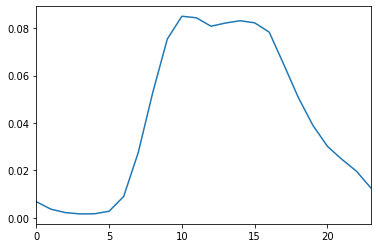

In [177]:
merge_hours = merged2['order_hour_of_day'].value_counts(normalize=True).sort_index().plot();

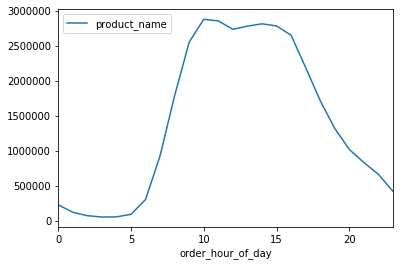

In [105]:
mm.plot();

In [101]:
mm

,product_name
order_hour_of_day,
3,53759
4,55714
2,72660
5,91909
1,121412
0,228031
6,302642
23,419585
22,662053


In [0]:
merrigold = pd.DataFrame(merged2.groupby(['order_hour_of_day','product_name']).product_id.count().sort_index())

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####